In [1]:
import numpy as np
from matplotlib import pyplot as plt

from eitprocessing.datahandling.loading import load_eit_data
from eitprocessing.features.pixel_inflation import PixelInflation

%matplotlib widget

In [2]:
path = ...

In [3]:
sequence = load_eit_data(
    path,
    vendor="draeger",
)

In [4]:
ssequence = sequence.t[55940:55970]

In [5]:
# ssequence = sequence.t[56600:56800]

In [6]:
eit_data = ssequence.eit_data["raw"]
eit_data.pixel_impedance = eit_data.pixel_impedance
continuous_data = ssequence.continuous_data["global_impedance_(raw)"]

In [8]:
%%prun
pi = PixelInflation()
inflation_container = pi.find_pixel_inflations(eit_data, continuous_data, ssequence, result_label="pixel inflations")

         442241 function calls (442027 primitive calls) in 0.514 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    33793    0.096    0.000    0.096    0.000 {method 'searchsorted' of 'numpy.ndarray' objects}
    11264    0.065    0.000    0.313    0.000 tidal_impedance_variation.py:163(_calculate_tiv_values)
    52812    0.038    0.000    0.171    0.000 fromnumeric.py:51(_wrapfunc)
        1    0.029    0.029    0.344    0.344 tidal_impedance_variation.py:70(compute_pixel_parameter)
52979/52784    0.026    0.000    0.240    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    33793    0.025    0.000    0.204    0.000 <__array_function__ internals>:177(searchsorted)
    33793    0.024    0.000    0.154    0.000 fromnumeric.py:1345(searchsorted)
     1990    0.024    0.000    0.104    0.000 pixel_inflation.py:165(<listcomp>)
        1    0.022    0.022    0.519    0.519 pixel_inflation.py:34(fin

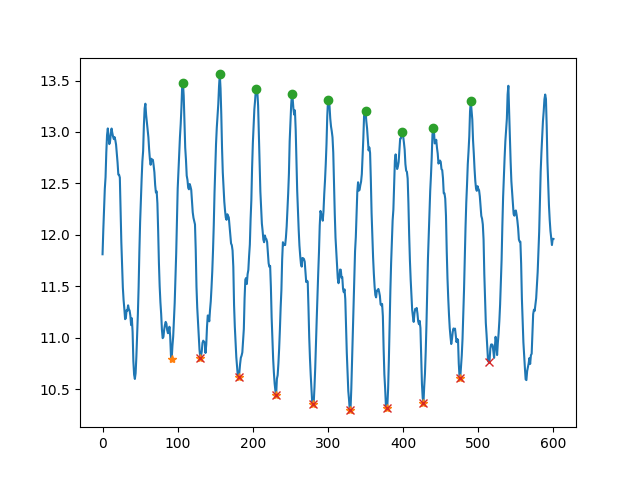

In [11]:
row = 8
col = 8
pixel_data = ssequence.eit_data["raw"].pixel_impedance

pixel_inflations = inflation_container.values

start_indices = [
    np.argmax(ssequence.eit_data["raw"].time == start_time)
    for pixel_inflation in pixel_inflations[:, row, col]
    if pixel_inflation is not None
    for start_time in [pixel_inflation.start_time]
]

middle_indices = [
    np.argmax(ssequence.eit_data["raw"].time == middle_time)
    for pixel_inflation in pixel_inflations[:, row, col]
    if pixel_inflation is not None
    for middle_time in [pixel_inflation.middle_time]
]

end_indices = [
    np.argmax(ssequence.eit_data["raw"].time == end_time)
    for pixel_inflation in pixel_inflations[:, row, col]
    if pixel_inflation is not None
    for end_time in [pixel_inflation.end_time]
]


plt.figure()
plt.plot(pixel_data[:, row, col])
plt.plot(start_indices, pixel_data[start_indices, row, col], "*")
plt.plot(middle_indices, pixel_data[middle_indices, row, col], "o")
plt.plot(end_indices, pixel_data[end_indices, row, col], "x")